<a href="https://colab.research.google.com/github/anandvimal/deeplearning-experiments/blob/master/mnist_keras_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 1.3 MNIST
this experiment is iteration from deep learning with keras book chapter 1

In this experiment we will use a different optimizer RMSprop and less epochs 20
(in previous experiment mnist_keras_1.2 we used SGD optimizer with 250 epochs)

In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility


Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 20         #reduced no of epocs
#NB_EPOCH = 500
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of classes(digits)
OPTIMIZER = RMSprop() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3        # we will use dropout to make sure model doest overfit as no of epochs we are doing are large.

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# data: shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [5]:
# normalize 
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
# one hot encoding
Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

In [7]:
#model 
model =Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES)) #we only have 10 classes for classification
model.add(Activation('softmax'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']    
)

In [9]:
history = model.fit(
    X_train, 
    Y_train,               
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose = VERBOSE,
    validation_split=VALIDATION_SPLIT
    )


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.4776 - acc: 0.8573 - val_loss: 0.1845 - val_acc: 0.9449
Epoch 2/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.2259 - acc: 0.9323 - val_loss: 0.1381 - val_acc: 0.9591
Epoch 3/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1748 - acc: 0.9485 - val_loss: 0.1173 - val_acc: 0.9653
Epoch 4/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1512 - acc: 0.9550 - val_loss: 0.1131 - val_acc: 0.9678
Epoch 5/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1342 - acc: 0.9610 - val_loss: 0.1031 - val_acc: 0.9706
Epoch 6/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1229 - acc: 0.9626 - val_loss: 0.0976 - val_acc: 0.9716
Epoch 7/20
48000/48000 [==============================] - 2s 44us/step - loss: 0

In [10]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)


10000/10000 [==============================] - 0s 35us/step


In [11]:
print("Test score/loss :", score[0])
print("Test accuracy: ", score[1])

Test score/loss : 0.09521282007504779
Test accuracy:  0.9787


In [12]:
#list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


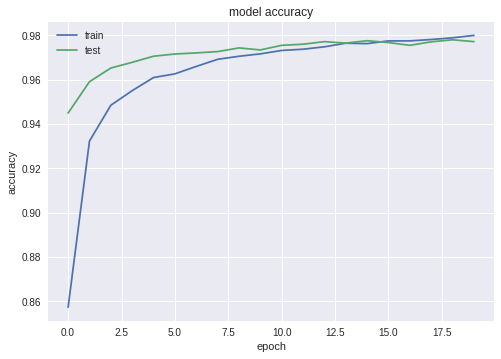

In [13]:
#plot for accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

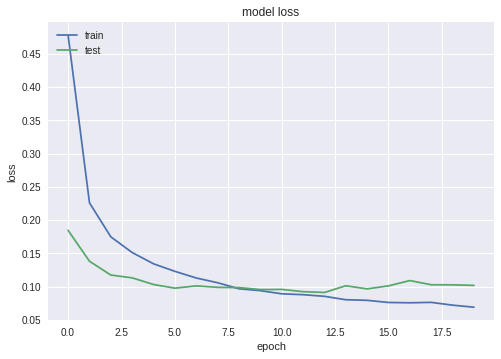

In [14]:
#plot for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

by changing the optimizer to RMSprop we got similar accuracy in just 20 epocs as compared to 250 epocs of training with SGD. 